In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
x=np.load('ch5_data.npz')
x.files
X=x['X']
X_min=x['X_min']
X_max=x['X_max']
X_n=x['X_n']
T=x['T']

w0=1.558,w1=135.872
SD=144.129cm


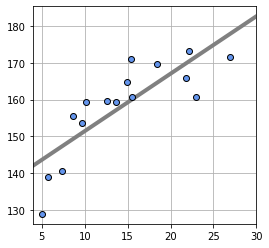

In [3]:
def fit_line(x,t):
    mx=np.mean(x)
    mt=np.mean(t)
    mtx=np.mean(t*x)
    mxx=np.mean(x*x)
    w0=(mtx-mt*mx)/(mxx-mx**2)
    w1=mt-w0*mx
    return np.array([w0,w1])

def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((x-t)**2)
    return mse

def show_line(w):
    xb=np.linspace(X_min,X_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)

    #해석해
W=fit_line(X,T)
print("w0={0:.3f},w1={1:.3f}".format(W[0],W[1]))
mse=mse_line(X,T,W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X,T,marker='o',linestyle="None",color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [4]:
X0=X
X0_min=5
X0_max=30
np.random.seed(seed=1)
X1=23*(T/100)**2+2*np.random.randn(X_n)
X1_min=40
X1_max=75
print(np.round(X0,2))
print(np.round(X1,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


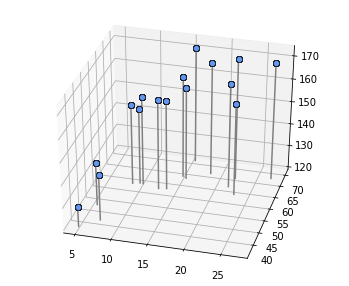

In [5]:
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


SD=12.876 cm


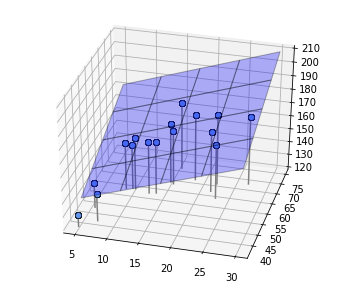

In [6]:
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

w0=0.5,w1=1.1,w2=89.0
SD=2.546cm


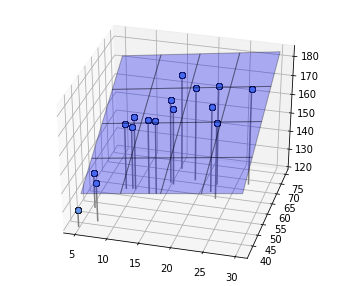

In [7]:
def fit_plane(x0,x1,t):
    c_tx0=np.mean(t*x0)-np.mean(t)*np.mean(x0)
    c_tx1=np.mean(t*x1)-np.mean(t)*np.mean(x1)
    c_x0x1=np.mean(x1*x0)-np.mean(x1)*np.mean(x0)
    v_x0=np.var(x0)
    v_x1=np.var(x1)
    w0=(c_tx1*c_x0x1-v_x1*c_tx0)/(c_x0x1**2-v_x0*v_x1)
    w1=(c_tx0*c_x0x1-v_x0*c_tx1)/(c_x0x1**2-v_x0*v_x1)
    w2=-w0*np.mean(x0)-w1*np.mean(x1)+np.mean(t)
    return np.array([w0,w1,w2])

plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
W=fit_plane(X0,X1,T)
print("w0={0:.1f},w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse=mse_plane(X0,X1,T,W)
print('SD={0:.3f}cm'.format(np.sqrt(mse)))
plt.show()

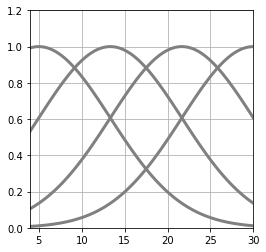

In [8]:
def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))


M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


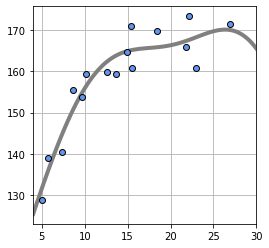

In [9]:
def gauss_func(w,x):
    m=len(w)-1
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    y=np.zeros_like(x)
    for j in range(m):
        y=y+w[j]*gauss(x,mu[j],s)
    y=y+w[m]
    return y

def mse_gauss_func(x,t,w):
    y=gauss_func(w,x)
    mse=np.mean((y-t)**2)
    return mse

def fit_gauss_func(x,t,m):
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    n=x.shape[0]
    psi=np.ones((n,m+1))
    for j in range(m):
        psi[:,j]=gauss(x,mu[j],s)
    psi_T=np.transpose(psi)
    
    b=np.linalg.inv(psi_T.dot(psi))
    c=b.dot(psi_T)
    w=c.dot(t)
    return w

def show_gauss_func(w):
    xb=np.linspace(X_min,X_max,100)
    y=gauss_func(w,xb)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)
    
plt.figure(figsize=(4,4))
M=4
W=fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_gauss_func(X,T,W)
print("W="+str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

In [19]:
X_test=X[:int(X_n/4+1)]
T_test=T[:int(X_n/4+1)]
X_train=X[int(X_n/4+1):]
T_train=T[int(X_n/4+1):]

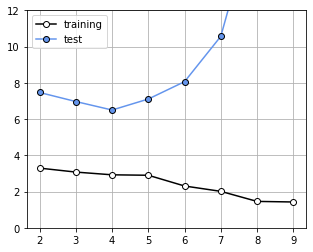

In [20]:
plt.figure(figsize=(5,4))
M=range(2,10)
mse_train=np.zeros(len(M))
mse_test=np.zeros(len(M))
for i in range(len(M)):
    W=fit_gauss_func(X_train,T_train,M[i])
    mse_train[i]=np.sqrt(mse_gauss_func(X_train,T_train,W))
    mse_test[i]=np.sqrt(mse_gauss_func(X_test,T_test,W))
plt.plot(M,mse_train,marker='o',linestyle="-",markerfacecolor='white',markeredgecolor='black',color='black',label='training')
plt.plot(M,mse_test,marker='o',linestyle="-",markeredgecolor='black',color='cornflowerblue',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.ylim(0,12)
plt.grid(True)
plt.show()

In [25]:
def khold_gauss_func(x,t,m,k):
    n=x.shape[0]
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        x_train=x[np.fmod(range(n),k)!=i]
        t_train=t[np.fmod(range(n),k)!=i]
        x_test=x[np.fmod(range(n),k)==i]
        t_test=t[np.fmod(range(n),k)==i]
        wm=fit_gauss_func(x_train,t_train,m)
        mse_train[i]=mse_gauss_func(x_train,t_train,wm)
        mse_test[i]=mse_gauss_func(x_test,t_test,wm)
    return mse_train,mse_test

In [27]:
M=4
K=4
khold_gauss_func(X,T,M,K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782016,  18.30921743,  47.52459642]))

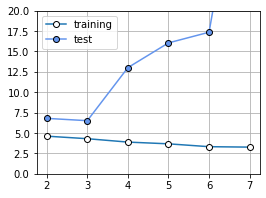

In [30]:
M=range(2,8)
K=16
Cv_gauss_train=np.zeros((K,len(M)))
Cv_gauss_test=np.zeros((K,len(M)))
for i in range(len(M)):
    Cv_gauss_train[:,i],Cv_gauss_test[:,i]=khold_gauss_func(X,T,M[i],K)
mean_gauss_train=np.sqrt(np.mean(Cv_gauss_train,axis=0))
mean_gauss_test=np.sqrt(np.mean(Cv_gauss_test,axis=0))

plt.figure(figsize=(4,3))
plt.plot(M,mean_gauss_train,marker='o',linestyle='-',markerfacecolor='white',markeredgecolor='black',label='training')
plt.plot(M,mean_gauss_test,marker='o',linestyle='-',color='cornflowerblue',markeredgecolor='black',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.ylim(0,20)
plt.grid(True)
plt.show()

In [60]:
def model_A(x,w):
    y=w[0]-w[1]*np.exp(-w[2]*x)
    return y
def show_model_A(w):
    xb=np.linspace(X_min,X_max,100)
    y=model_A(xb,w)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)
    
def mse_model_A(w,x,t):
    y=model_A(x,w)
    mse=np.mean((y-t)**2)
    return mse


In [61]:
from scipy.optimize import minimize 

def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x


w0=169.0,w1=113.7,w2=0.2
SD=3.86cm


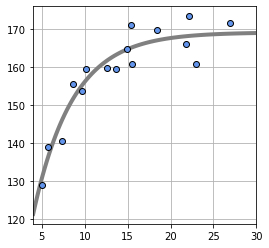

In [63]:

plt.figure(figsize=(4,4))
W_init=[100,0,0]
W=fit_model_A(W_init,X,T)
print("w0={0:.1f},w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_model_A(W,X,T)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

In [78]:
def kfold_model_A(x,t,k):
    n=len(x)
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        x_train=x[np.fmod(range(n),k)!=i]
        t_train=t[np.fmod(range(n),k)!=i]
        x_test=x[np.fmod(range(n),k)==i]
        t_test=t[np.fmod(range(n),k)==i]
        wm=fit_model_A(np.array([169,113.7,0.2]),x_train,t_train)
        mse_train[i]=mse_model_A(wm,x_train,t_train)
        mse_test[i]=mse_model_A(wm,x_test,t_test)
    return mse_train,mse_test
    


Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


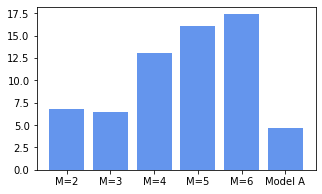

In [79]:
K=16
Cv_A_train,Cv_A_test=kfold_model_A(X,T,K)
mean_A_test=np.sqrt(np.mean(Cv_A_test))
SD=np.append(mean_gauss_test[0:5],mean_A_test)
M=range(6)
label=["M=2","M=3","M=4","M=5","M=6","Model A"]
plt.figure(figsize=(5,3))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
plt.bar(M,SD,tick_label=label,align='center',facecolor='cornflowerblue')
plt.show()